# Nuestra pregunta de “investigación” sería: ¿Cómo afectan los SDGs a la Transición Enegética y Cambio Climático?

SDGs
1. Fin de la Pobreza
2. Hambre Cero
3. Salud y Bienestar
4. Educación y Calidad
5. Igualdad de Género
6. Agua Limpia y Saneamiento
7. Energía asequible y no Contaminante
8. Trabajo Decente y Crecimiento Económico
9. Industria Innovación e Infraestructura
10. Reducción de las Desigualdades
11. Ciudades y Comunidades Sostenibles
12. Producción y consumo responsable
13. Acción por el Clima
14. Vida Submarina
15. Vida de Ecosistemas Terrestres
16. Paz, Justicia e Instituciones Sólidas
17. Alianzas para Lograr los Objetivos


# Carga de Datos

In [1]:
# Import the required variables
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [3]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [2]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<Figure size 432x288 with 0 Axes>

In [3]:
SDGs_Ranks_Filenames = ['SDGs_Ranks_2017', 'SDGs_Ranks_2018', 'SDGs_Ranks_2019', 'SDGs_Ranks_2020','SDGs_Ranks_2021']
#SDGs_Scores = ['SDGs_Scores_2017', 'SDGs_Scores_2018', 'SDGs_Scores_2019', 'SDGs_Scores_2020','SDGs_Scores_2021']
SDGs_Scores_Filenames = ['SDGs_Scores_2017', 'SDGs_Scores_2018', 'SDGs_Scores_2020','SDGs_Scores_2021']

# Read the Res_Nonhydro_Capita data
Res_Nonhydro_Capita = pd.read_excel ("../data/processed/Res_Nonhydro_Capita.xlsx", index_col = 0)

# A.- PROCESO CON SDGs_Scores

In [4]:
#
# SDGs_Scores
#

# Create an empty DataFrame wich will contain all the info
SDGs_Scores = pd.DataFrame()  
nYearsSDGs_Scores = int(len(SDGs_Scores_Filenames))

# For the considered years 
for filename in SDGs_Scores_Filenames:
    # Capture Res_Nonhydro_Capita for the considered year 
    year = int(filename[-4:])
    Res_Nonhydro_Capita_yyyy = Res_Nonhydro_Capita[[year]]
    Res_Nonhydro_Capita_yyyy= Res_Nonhydro_Capita_yyyy.rename(columns={ year: 'Res_Nonhydro_Capita'})

    # Wrangling SDGs_Scores for the considered year
    SDGs_Scores_yyyy = pd.read_excel ("../data/processed/" + filename + ".xlsx", index_col = 0)
    SDGs_Scores_yyyy = SDGs_Scores_yyyy.iloc[:,1:] # Eliminate the SDGs column
    SDGs_Scores_yyyy = pd.concat([SDGs_Scores_yyyy, Res_Nonhydro_Capita_yyyy], axis=1)

    SDGs_Scores_yyyy.insert(0, 'Year', year)
    # SDGs_Scores_yyyy['Year'] = year

    SDGs_Scores_yyyy.reset_index(inplace=True)
    # print('Year', year, 'Shape', SDGs_Scores_yyyy.shape)

    # Append the year to the container
    SDGs_Scores = pd.concat([SDGs_Scores, SDGs_Scores_yyyy], axis=0)

nIndividualsSDGs_Scores = int(SDGs_Scores.shape[0] / nYearsSDGs_Scores)

SDGs_Scores['Country'] = SDGs_Scores.Country.astype('string')
#SDGs_Scores['Year'] = SDGs_Scores.Year.astype('string')
SDGs_Scores = SDGs_Scores.sort_values(["Country", "Year"], ascending = (True, True))

SDGs_Scores.reset_index(drop=True, inplace=True)
#index = pd.MultiIndex.from_frame(SDGs_Scores, names=['Country', 'Year'])
# SDGs_Scores.index = index 

# SDGs_Scores.set_index(['Country', 'Year'], inplace=True)
display(SDGs_Scores.head())

Country  Year       SDG1       SDG2       SDG3       SDG4       SDG5  \
0  Afghanistan  2017  53.300812  38.824562  39.236931  17.361549  21.819971   
1  Afghanistan  2018  63.790201  40.261773  37.863265   6.936936  24.607205   
2  Afghanistan  2020  63.790201  45.246143  36.643714  54.601667  32.807500   
3  Afghanistan  2021  63.790201  50.131000  37.098357  57.851217  23.162500   
4      Algeria  2017  98.044632  50.922810  75.809746  79.222893  47.406410   

        SDG6       SDG7       SDG8       SDG9      SDG10      SDG11  \
0  43.073383  53.140701  32.215218   1.799845  93.597755  38.731819   
1  49.261909  52.030878  31.177988   3.792995  65.436978  39.359421   
2  46.313800  64.265500  40.560600   6.480667  65.436978  39.400000   
3  46.313800  64.822500  37.753167   6.546833  65.436978  31.761250   
4  68.292290  79.466873  64.238663  19.861027  88.864923  75.394531   

       SDG12      SDG13      SDG14      SDG15      SDG16       SDG17  \
0  82.073906  87.292320  48.422883  37.941803  51.607609   56.967537   
1  82.073902  87.666331  48.422883  50.829361  47.577309   54.971700   
2  90.838167  99.026667  48.422883  52.181600  46.578375   46.320000   
3  90.816833  99.064667  48.422883  52.984000  52.026667   43.359500   
4  81.501633  90.548424  45.372234  60.060841  64.072205  100.000000   

   Res_Nonhydro_Capita  
0             1.046936  
1             0.995363  
2             1.027529  
3             1.139890  
4            14.013318

In [5]:
#
# PROCESS WITH SDGs_Scores
#

data = SDGs_Scores.copy()
data.drop(['Country', 'Year'], axis=1, inplace=True)

# Crea tuples (individual, year) to initialize index
#
tuples = [] 
for i in range(1,nIndividualsSDGs_Scores + 1): 
    for j in range(1,nYearsSDGs_Scores + 1 ): 
        tuples.append((i,j)) 
index = pd.MultiIndex.from_tuples(tuples, names=['Individual', 'Year']) 

data.index = index 
display(data.head())

SDG1       SDG2       SDG3       SDG4       SDG5  \
Individual Year                                                          
1          1     53.300812  38.824562  39.236931  17.361549  21.819971   
           2     63.790201  40.261773  37.863265   6.936936  24.607205   
           3     63.790201  45.246143  36.643714  54.601667  32.807500   
           4     63.790201  50.131000  37.098357  57.851217  23.162500   
2          1     98.044632  50.922810  75.809746  79.222893  47.406410   

                      SDG6       SDG7       SDG8       SDG9      SDG10  \
Individual Year                                                          
1          1     43.073383  53.140701  32.215218   1.799845  93.597755   
           2     49.261909  52.030878  31.177988   3.792995  65.436978   
           3     46.313800  64.265500  40.560600   6.480667  65.436978   
           4     46.313800  64.822500  37.753167   6.546833  65.436978   
2          1     68.292290  79.466873  64.238663  19.861027  88.864923   

                     SDG11      SDG12      SDG13      SDG14      SDG15  \
Individual Year                                                          
1          1     38.731819  82.073906  87.292320  48.422883  37.941803   
           2     39.359421  82.073902  87.666331  48.422883  50.829361   
           3     39.400000  90.838167  99.026667  48.422883  52.181600   
           4     31.761250  90.816833  99.064667  48.422883  52.984000   
2          1     75.394531  81.501633  90.548424  45.372234  60.060841   

                     SDG16       SDG17  Res_Nonhydro_Capita  
Individual Year                                              
1          1     51.607609   56.967537             1.046936  
           2     47.577309   54.971700             0.995363  
           3     46.578375   46.320000             1.027529  
           4     52.026667   43.359500             1.139890  
2          1     64.072205  100.000000            14.013318

## **Exploratory Data Analysis**

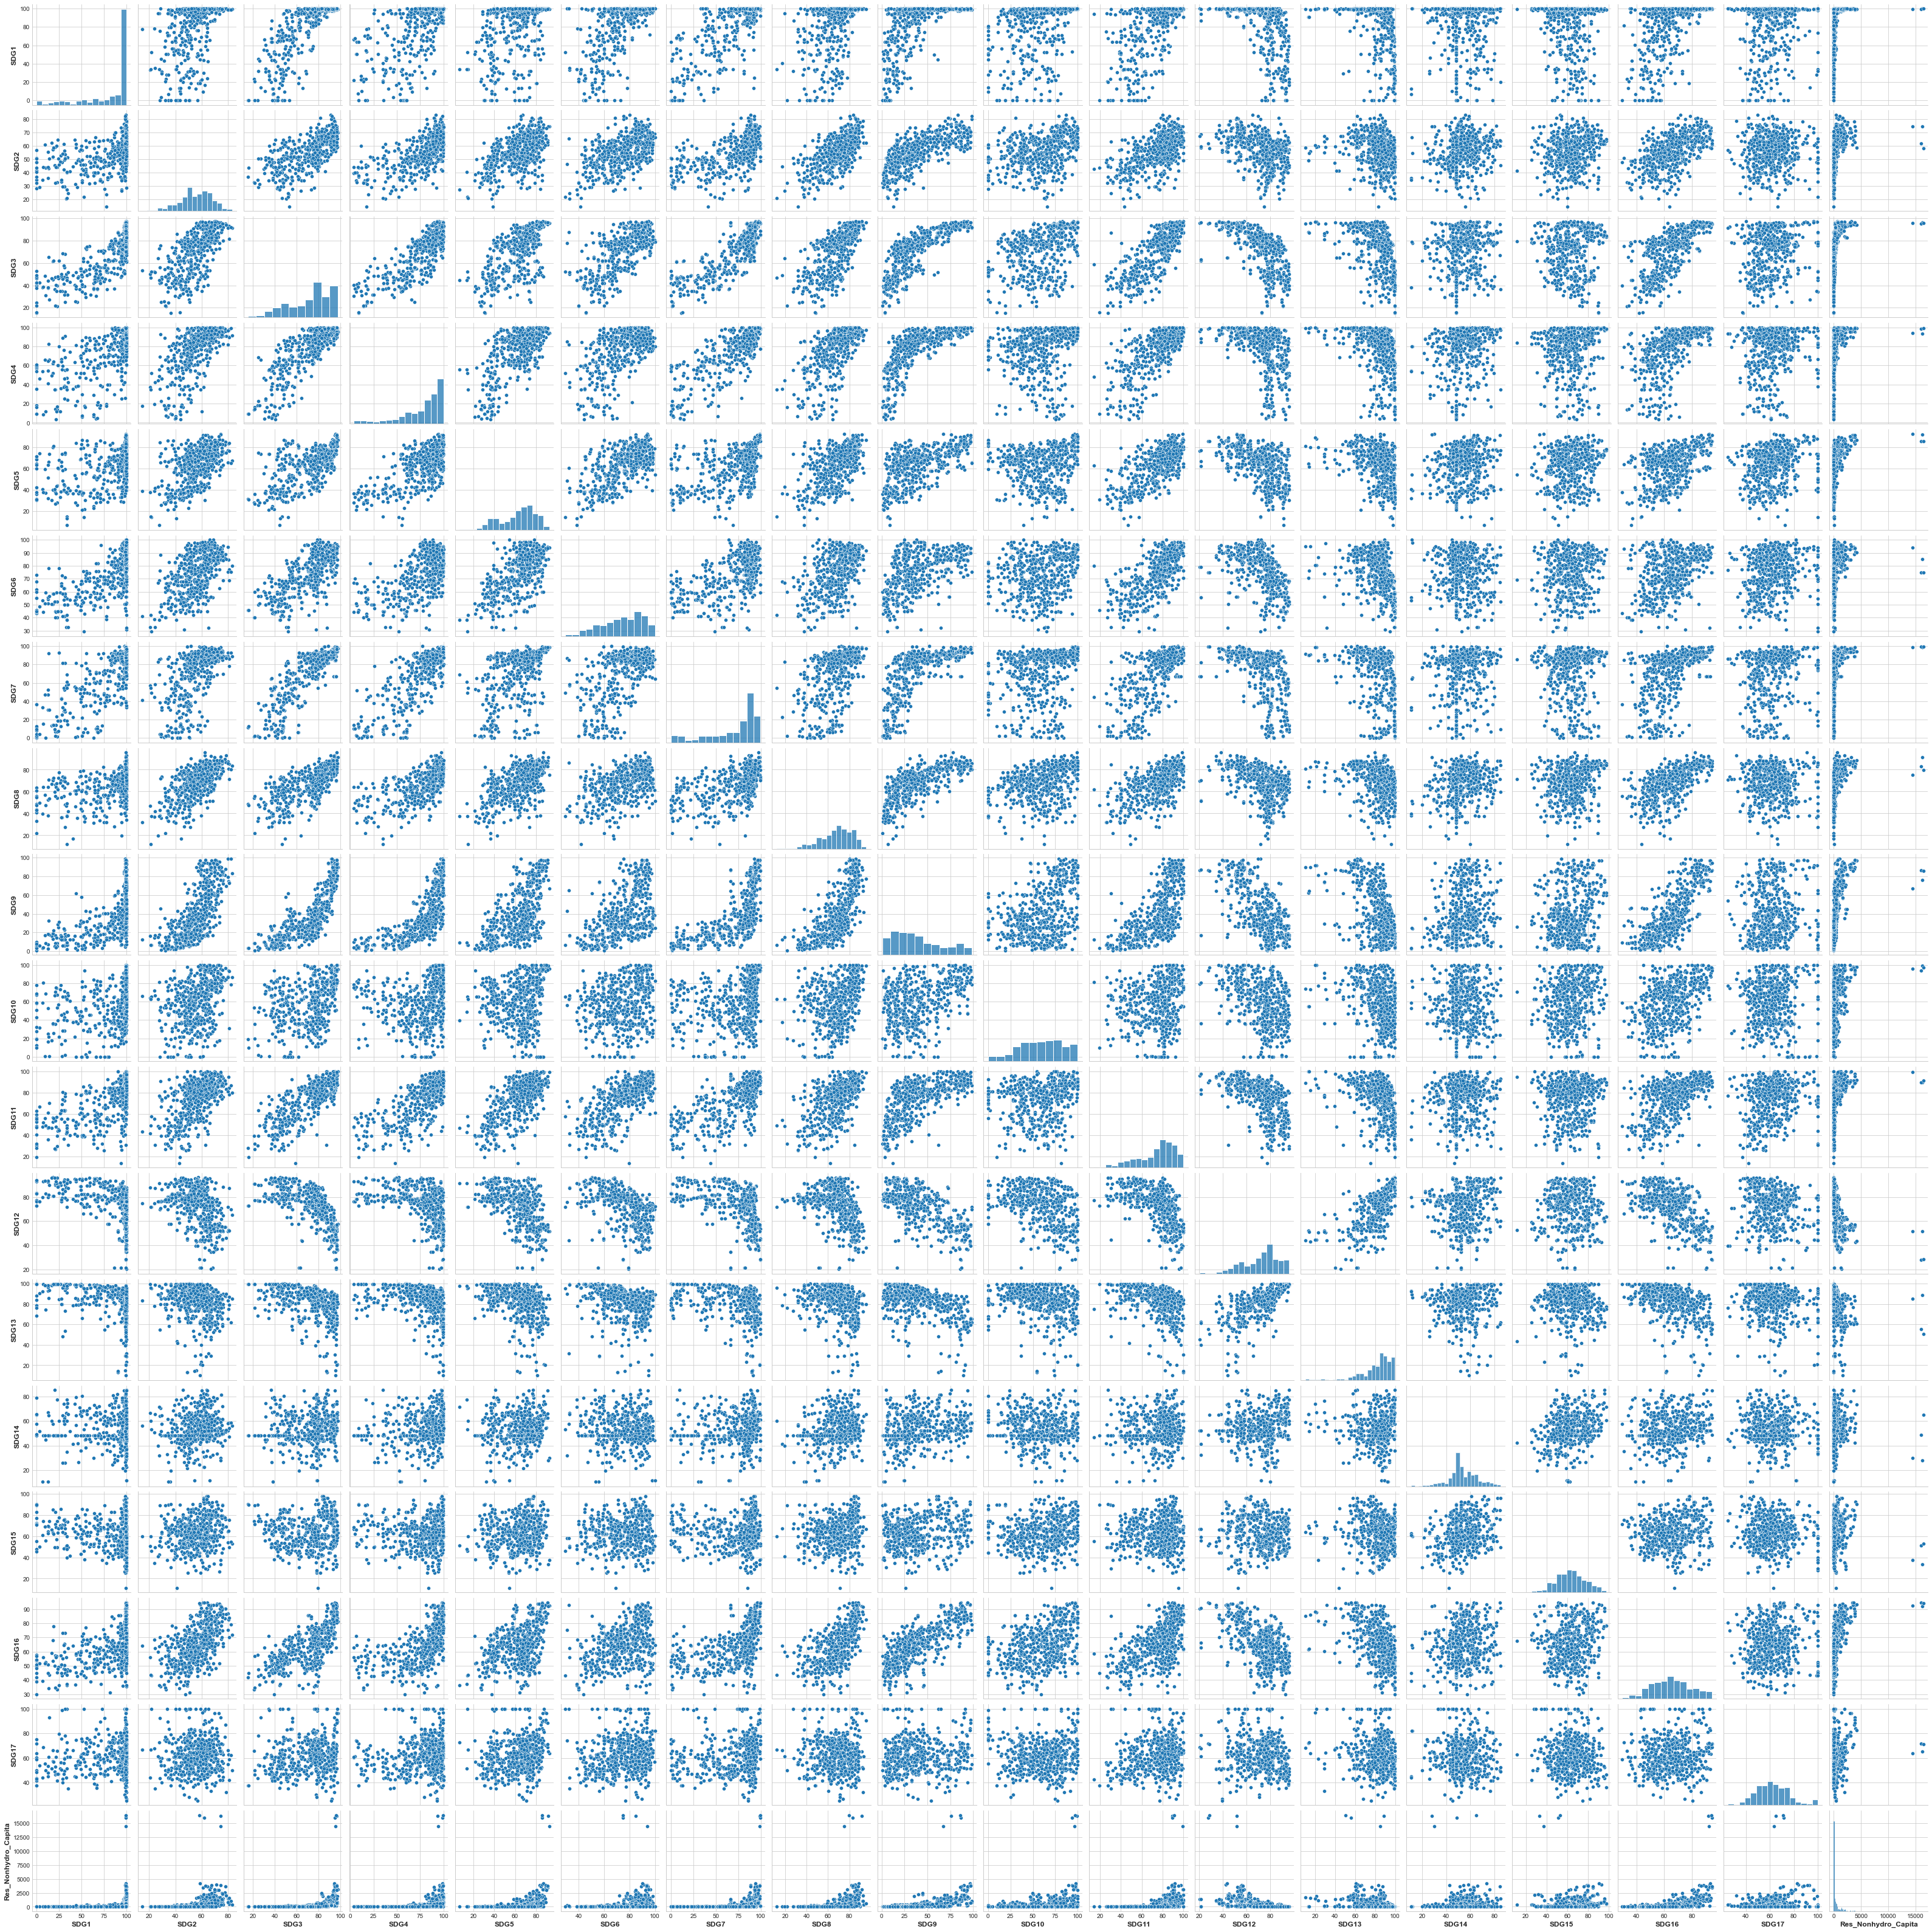

In [11]:
sns.pairplot(data);

In [12]:
data.corr()

SDG1      SDG2      SDG3      SDG4      SDG5  \
SDG1                 1.000000  0.506422  0.793189  0.666980  0.435204   
SDG2                 0.506422  1.000000  0.677802  0.653505  0.558248   
SDG3                 0.793189  0.677802  1.000000  0.826829  0.651612   
SDG4                 0.666980  0.653505  0.826829  1.000000  0.681852   
SDG5                 0.435204  0.558248  0.651612  0.681852  1.000000   
SDG6                 0.665507  0.563653  0.715685  0.609696  0.642801   
SDG7                 0.785101  0.599394  0.844906  0.803981  0.510480   
SDG8                 0.477832  0.654227  0.703466  0.665247  0.580363   
SDG9                 0.582393  0.716384  0.811095  0.716423  0.617971   
SDG10                0.369532  0.347393  0.389510  0.179498  0.085348   
SDG11                0.614842  0.550467  0.789088  0.716628  0.661693   
SDG12               -0.504895 -0.412494 -0.664010 -0.488278 -0.518781   
SDG13               -0.372047 -0.209749 -0.465614 -0.381993 -0.378299   
SDG14               -0.006130  0.164002  0.090782  0.184025  0.122399   
SDG15               -0.056395  0.172879  0.030270  0.047535  0.140382   
SDG16                0.520846  0.559728  0.703089  0.581362  0.457132   
SDG17                0.144529  0.013810  0.160961  0.154586  0.192230   
Res_Nonhydro_Capita  0.220442  0.326198  0.376133  0.269402  0.369424   

                         SDG6      SDG7      SDG8      SDG9     SDG10  \
SDG1                 0.665507  0.785101  0.477832  0.582393  0.369532   
SDG2                 0.563653  0.599394  0.654227  0.716384  0.347393   
SDG3                 0.715685  0.844906  0.703466  0.811095  0.389510   
SDG4                 0.609696  0.803981  0.665247  0.716423  0.179498   
SDG5                 0.642801  0.510480  0.580363  0.617971  0.085348   
SDG6                 1.000000  0.605219  0.502769  0.558663  0.242988   
SDG7                 0.605219  1.000000  0.546565  0.680473  0.233417   
SDG8                 0.502769  0.546565  1.000000  0.721256  0.311049   
SDG9                 0.558663  0.680473  0.721256  1.000000  0.410333   
SDG10                0.242988  0.233417  0.311049  0.410333  1.000000   
SDG11                0.669622  0.686857  0.592746  0.634398  0.173361   
SDG12               -0.522638 -0.468845 -0.441033 -0.666349 -0.367826   
SDG13               -0.320523 -0.337833 -0.277337 -0.527206 -0.264142   
SDG14               -0.007835  0.140678  0.264849  0.244055 -0.062477   
SDG15                0.104757 -0.010167  0.147044  0.185977  0.186894   
SDG16                0.402400  0.519282  0.618798  0.767029  0.461664   
SDG17                0.164904  0.164027 -0.049553  0.086491 -0.000772   
Res_Nonhydro_Capita  0.267160  0.282504  0.328180  0.464906  0.304900   

                        SDG11     SDG12     SDG13     SDG14     SDG15  \
SDG1                 0.614842 -0.504895 -0.372047 -0.006130 -0.056395   
SDG2                 0.550467 -0.412494 -0.209749  0.164002  0.172879   
SDG3                 0.789088 -0.664010 -0.465614  0.090782  0.030270   
SDG4                 0.716628 -0.488278 -0.381993  0.184025  0.047535   
SDG5                 0.661693 -0.518781 -0.378299  0.122399  0.140382   
SDG6                 0.669622 -0.522638 -0.320523 -0.007835  0.104757   
SDG7                 0.686857 -0.468845 -0.337833  0.140678 -0.010167   
SDG8                 0.592746 -0.441033 -0.277337  0.264849  0.147044   
SDG9                 0.634398 -0.666349 -0.527206  0.244055  0.185977   
SDG10                0.173361 -0.367826 -0.264142 -0.062477  0.186894   
SDG11                1.000000 -0.570463 -0.382489  0.087008  0.021071   
SDG12               -0.570463  1.000000  0.684984  0.052071 -0.065477   
SDG13               -0.382489  0.684984  1.000000 -0.026997 -0.086457   
SDG14                0.087008  0.052071 -0.026997  1.000000  0.245828   
SDG15                0.021071 -0.065477 -0.086457  0.245828  1.000000   
SDG16                0.534847 -0.583501 -0.442094  0.154619  0.141329   
SDG17   

In [13]:
df = data.copy()

# Borra las columnas con una correlacion menor a 0.2
corr = np.abs(df.corr()['Res_Nonhydro_Capita']).sort_values(ascending=True)
print(corr)

bad_corr_feat = corr[corr <0.2].index.values
print(bad_corr_feat)

df.drop(columns = bad_corr_feat, inplace = True)

SDG15                  0.010842
SDG14                  0.030551
SDG17                  0.119437
SDG1                   0.220442
SDG13                  0.231855
SDG6                   0.267160
SDG4                   0.269402
SDG7                   0.282504
SDG11                  0.301823
SDG10                  0.304900
SDG2                   0.326198
SDG8                   0.328180
SDG5                   0.369424
SDG3                   0.376133
SDG12                  0.435329
SDG16                  0.451625
SDG9                   0.464906
Res_Nonhydro_Capita    1.000000
Name: Res_Nonhydro_Capita, dtype: float64
['SDG15' 'SDG14' 'SDG17']


Tienen una correlacion < 0.2 con Res_Nonhydro_Capita
* SDG15
* SDG14
* SDG17

Los que mas correlacion tinen con Res_Nonhydro_Capita son:
* SDG9 = 0.46
* SDG16 = 0.45
* SDG12 = -0.44


In [14]:
# Establece los límites de colores entre [-1, 1], así como un rango de colores de oscuro a oscuro, pasando por claro (0 correlación)
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

# 1.- Modelos Panel Data 
Los modelos de panel data o datos de panel son modelos que trabajan con data tomada a n individuos a lo largo de t periodos. Tenemos n individuos, por ejemplo, paises A, B y C, de los cuales tomamos las variables x e y. Los individuos y las variables observadas permanecerán siempre iguales. Nota: Esta peculiaridad es también la principal diferencia con otro concepto de datos, a menudo mezclado, denominado secciones transversales agrupadas. Si bien ambos pueden verse como datos transversales a lo largo los t periodos, la principal diferencia es que los datos de panel es que siempre se observan los mismos individuos, mientras que esto no ocurre en secciones transversales agrupadas.

Se distinguen dos casos de estos modelos basados en las dimensiones de los datos disponibles: 
1. Cuando t >> n, es decir, que la dimensión temporal es mucho mayor que la dimensión de la sección cruzada. A estos tipos de panel data se les conoce como panel de serie de tiempo, se los encuentra a menudo en macroeconomía y son los menos comunes. 
2. Cuando t << n, es decir, que la dimension de la sección cruzada es mucho mayor que la dimensión temporal. A estos tipos de panel data se les conoce como panel de sección cruzada, se los encuentra a menudo en microeconomía y son los más comunes. En general, los modelos de panel data están más orientados al análisis de este tipo de data. 
3. Cuando ti != t, es decir, que la dimension temporal varia para cada individuo. A estos tipos de panel data se les conoce como panel desbalanceado.

Las fórmulas que se desarrollan en las siguientes secciones asumen que los datos provienen de un panel de datos balanceados. Un conjunto de datos de panel se denomina "balanceados" si no faltan valores dentro del conjunto de datos; de lo contrario, se denominaría "desbalanceado". La biblioteca de Python con la que trabajaremos Linearmodels permite estimar modelos utilizando paneles de datos desbalanceados. 

En general, los modelos de panel data tienen las siguientes ventajas: 
* Como se dispone de un mayor número de observaciones nt, se **"reduce la colinealidad"** entre las variables exógenas lo que mejora la eficiencia de los coeficientes. 
* Nos permite capturar la **"heterogeneidad no observable"** (ver abajo), ya sea entre individuos como a lo largo del tiempo. Además, permite aplicar una pruebas de hipótesis para confirmar o rechazar dicha heterogeneidad. 
* Los modelos de panel data son más informativos ya que **"reflejan la dinámica y causalidad de Granger"** a lo largo de todas las variables. 
* Permite diseñar y probar modelos complejos que buscan **"explicar el comportamiento de varios individuos a lo largo del tiempo"**. 
Por otra parte, las desventajas de este modelo están asociadas principalmente a los procesos para la obtención y el procesamiento de la data de los individuos. Entre estás desventajas tenemos: 
* Es muy probable que las observaciones no sean independientes. 
* Las muestras utilizadas pueden no ser representativas.

Referencias:
* Saito, Marlon. Econometría Práctica con Python (Spanish Edition) (Capítulo 12: "Data Panel").
* [A Guide to Panel Data Regression por Brugger, Bernhard](https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8)



#### El problema de la endogeneidad causado por la "heterogeneidad no observable"
La dependencia no observada de otra(s) variable(s) independiente(s) se denomina **"heterogeneidad no observable"** y la correlación entre la(s) variable(s) independiente(s) y el término de error (es decir, las variables independientes no observadas) se denomina **"endogeneidad"**.

Digamos, queremos analizar la relación de los SDGs afectan a la Transición Enegética y Cambio Climático (e.d., representada por la inversion en Energías Renovables, denominada por la variable Res_Nonhydro_Capita). Esto se prodria ver con un modelo de regresión linear múltiple que se podría ver así: 

Res_Nonhydro_Capita es la variable dependiente
β0 es el intercepto
βi son los coeficiente de regresión que afectan las variables independientes SDGi (i = 1..17)
ɛ es el término de error

#### Correlación entre los SDGi y término de error
En nuestro modelo existen otras variables que afectan a nuestros SDGi, tales variables se denominan variables independientes no observadas. Están "ocultos" detrás del término de error y si algún SDGi se relaciona positivamente con dichas variables (por ejemplo, nivel de desarrollo del país, GDP PPP capita, etc.), el término de error aumentaría a medida que aumentan esos SDGi, y esto aumentaría excesivamente la variable Res_Nonhydro_Capita estimada.

De esta forma **"nuestro estimador estaría sesgado debido a la heterogeneidad"**, esto daría lugar a un estimador demasiado elevado de Res_Nonhydro_Capita. Por lo tanto, la variable Res_Nonhydro_Capita estimada estaría sesgada y daría lugar a inferencias inexactas. En nuestro ejemplo, este sesgo traería un aumento excesivo de Res_Nonhydro_Capita.

La regresión con panel data nos permite controlar la heterogeneidad de nuestro modelo de regresión al reconocer tal heterogeneidad como fija ("fixed") o aleatoria ("random").

#### Modelo General

Primero vamos a definir una especificación general de un modelo de panel data ( n individuos a lo largo de t periodos):

![Panel](img/Panel_Data_0.png "Modelo General")

Nomenclatura: 
* cij es el efecto de los individuos
* εi,j es el error propio de la observación

En los modelos de datos de panel, el objetivo principal es estimar los coeficionetes o efectos parciales β. A partir del modelo general, vamos a desarrollar diversos modelos en donde se asumen diferentes tipos de efectos individuales y temporales.

Hay tres tipos de regresión para panel data:
* 12.3. Regresión Agrupada (Pooled Regression)
* 12.4. Efectos fijos (Fixed Effects - FE)
* 12.5. Efectos aleatorios (Random Effects - RE)


## 2.- ¿Cómo decidir qué modelo es el adecuado?

1. **Elegir entre Pooled Regression y FE/RE**: Básicamente, hay cinco condiciones para los modelos de regresión lineal simple que se deben cumplir. Dos de ellas nos pueden ayudar a elegir entre Pooled Regression y FE/RE.

- Estas condiciones son (1) Linealidad, (2) Exogeneidad, (3a) Homocedasticidad y (3b) No autocorrelación, (4) Las variables independientes no son Estocásticas y (5) No Multicolinealidad.

- Si se violan las condiciones (2) o (3) (o ambos), entonces FE o RE podrían ser más adecuados.

2. **Elegir entre FE y RE**: Responder a esta pregunta depende de su suposición, si la heterogeneidad individual no observada es un efecto constante o aleatorio. Pero esta pregunta también se puede responder realizando el Test de Hausman.

### Comprobación de la Condición 3

La condición 3 se divide en 3a (Homocedasticidad) y 3b (No autocorrelación). Esas suposiciones se pueden probar con una serie de tests diferentes. Para la condición 3a, se puede identificar gráficamente la heteroscedasticidad y realizar el test de White y el test de Breusch-Pagan (ambas son similares). Para la condición 3b, se realiza un test de Durbin-Watson.

Homocedasticidad: varianza constante de los errores a lo largo de las observaciones

Primero realizo una Pooled Regression

In [6]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm

#Definiendo las variables exogenas
exog = ['SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15' , 'SDG16', 'SDG17'] 

Y = data['Res_Nonhydro_Capita']
X = sm.add_constant(data[exog]) 

mod = PooledOLS(Y, X)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

Compruebo la condición de Homoscedasticity

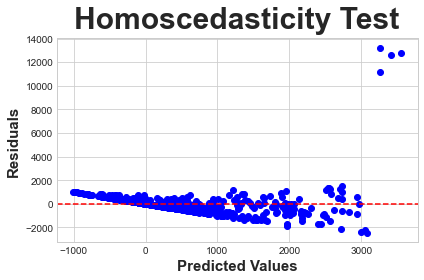

In [7]:
# 3A. Homoscedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoscedasticity Test', fontsize = 30)
plt.show()

Básicamente, una gráfica de residuos representa los valores pronosticados (eje x) frente a los residuos (eje y). Si los puntos de datos graficados se dispersan, este es un indicador de varianza creciente y, por lo tanto, de heteroscedasticidad. Dado que este parece ser el caso en nuestro ejemplo, podríamos tener la primera violación. Pero vamos a comprobar esto con el White- y el Breusch-Pagan-Test:

In [8]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([data, residuals_pooled_OLS], axis=1)
#pooled_OLS_dataset = pooled_OLS_dataset.drop(['Year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(data['Res_Nonhydro_Capita']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 545.3623973553383, 'LM p-val': 3.767559290005047e-119, 'F-Stat': 56343.30613828721, 'F p-val': 0.0}
{'LM-Stat': 415.32521910248954, 'LM p-val': 2.5408617289978072e-92, 'F-Stat': 1709.198749724217, 'F p-val': 2.6743807880429675e-170}


En términos simples, si p < 0.05, entonces se indica heteroscedasticidad.

Ambas pruebas dan un valor p muy pequeño: (White-test: 3.767559290005047e-119, Breusch-Pagan-test: 2.5408617289978072e-92).

**!Existe heteroscedasticidad!** -->  por lo tanto, hemos probado nuestra primera violación de condición

Analicemos el supuesto 3b:

In [9]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.531786079310787


La prueba de Durbin-Watson tendrá un resultado entre 0 y 4. 

* La media (= 2) indicaría que no se ha identificado una autocorrelación, 
* 0 - 2 significa una autocorrelación positiva (cuanto más cerca de cero, mayor es la correlación), y 
* 2 - 4 significa autocorrelación negativa (cuanto más cerca de cuatro, mayor es la correlación). 

En nuestro ejemplo, el resultado es 0.531786079310787, lo que indica claramente una fuerte autocorrelación positiva.

Como consecuencia, **también se viola la condiciones 3b**, existe autocorrelación de los residuos o errores (los errores no son independientes), por lo que parece que un modelo Efectos fijos (Fixed Effects - FE) o Efectos aleatorios (Random Effects - RE) será más adecuado.

**Una vez comprobado que la Pooled Regression no es la mas adecuada porque se violan las condiciones 3a y 3b,tenemos que elgir entre FE o RE. Por ello, a continuación se connstruyen los modelos FE y RE. Para ver cuál es mejor, si RE o FE, se aplica el Test de Hausman**

### Modelos de Efectos Fijos y Aleatorios, y Test de Hausman

En la práctica, se necesita de un criterio que nos permita comprobar si el modelo de efectos fijos o el de efectos aleatorios se ajusta mejor a la data con la que estamos trabajando.

El test de Hausman es una prueba de endogeneidad. Al ejecutar el test de Hausman, la hipótesis nula es que la covarianza entre Xij y Cij es cero (cov(xij, cij) = 0). Si este es el caso, entonces se prefiere RE sobre FE. Si la hipótesis nula no es cierta, debemos optar por el modelo FE.

Aplicamos nuestro modelo con y sin escalado.

#### A.- SIN ESCALADO

In [10]:
from scipy import stats
import numpy as np

import linearmodels as lm 
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects

# Test de Hausman
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, np.linalg.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

#Definiendo las variables exoogenas
exog = ['SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15' , 'SDG16', 'SDG17'] 

Y = data['Res_Nonhydro_Capita']
X = sm.add_constant(data[exog]) 

# fixed effects model
fe_res = lm.panel.PanelOLS(Y, X, entity_effects=True).fit() 
# random effects model
re_res = lm.panel.RandomEffects(Y, X).fit() 

# print results
print('------- Resultados FE-model: -------')
print(fe_res)
print('------- Resultados RE-model: -------')
print(re_res)

hausman_results = hausman(fe_res, re_res) 
print('------- Resultados del Test de Hausman: -------')
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))


------- Resultados FE-model: -------
                           PanelOLS Estimation Summary                           
Dep. Variable:     Res_Nonhydro_Capita   R-squared:                        0.3388
Estimator:                    PanelOLS   R-squared (Between):              0.0640
No. Observations:                  548   R-squared (Within):               0.3388
Date:                 Sun, Apr 17 2022   R-squared (Overall):              0.0658
Time:                         11:51:30   Log-likelihood                   -3303.8
Cov. Estimator:             Unadjusted                                           
                                         F-statistic:                      11.874
Entities:                          137   P-value                           0.0000
Avg Obs:                        4.0000   Distribution:                  F(17,394)
Min Obs:                        4.0000                                           
Max Obs:                        4.0000   F-statistic (robust)

In [26]:
fe_res.variance_decomposition

Effects                   2.115753e+06
Residual                  1.009660e+04
Percent due to Effects    9.952506e-01
Name: Variance Decomposition, dtype: float64

#### CON ESCALADO

In [11]:
from scipy import stats
import numpy as np
import linearmodels as lm 

# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects

from sklearn import preprocessing

def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, np.linalg.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

#Definiendo las variables exoogenas
exog = ['SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15' , 'SDG16', 'SDG17'] 

Y = data['Res_Nonhydro_Capita']

std_scale = preprocessing.StandardScaler().fit(data[exog])
X_scal = std_scale.transform(data[exog])
X_scal_aux = pd.DataFrame(X_scal, columns = exog)
X = sm.add_constant(X_scal_aux) 


# RECREA DE NUEVO tuples (individual, year) to initialize index
tuples = [] 
for i in range(1,nIndividualsSDGs_Scores + 1): 
    for j in range(1,nYearsSDGs_Scores + 1 ): 
        tuples.append((i,j)) 
index = pd.MultiIndex.from_tuples(tuples, names=['Individual', 'Year']) 

X.index = index 

# fixed effects model
fe_res = lm.panel.PanelOLS(Y, X, entity_effects=True).fit() 
# random effects model
re_res = lm.panel.RandomEffects(Y, X).fit() 

# print results
print('------- Resultados FE-model: -------')
print(fe_res)
print('------- Resultados RE-model: -------')
print(re_res)

hausman_results = hausman(fe_res, re_res) 
print('------- Resultados del Test de Hausman: -------')
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

------- Resultados FE-model: -------
                           PanelOLS Estimation Summary                           
Dep. Variable:     Res_Nonhydro_Capita   R-squared:                        0.3388
Estimator:                    PanelOLS   R-squared (Between):              0.0640
No. Observations:                  548   R-squared (Within):               0.3388
Date:                 Sun, Apr 17 2022   R-squared (Overall):              0.0658
Time:                         11:51:37   Log-likelihood                   -3303.8
Cov. Estimator:             Unadjusted                                           
                                         F-statistic:                      11.874
Entities:                          137   P-value                           0.0000
Avg Obs:                        4.0000   Distribution:                  F(17,394)
Min Obs:                        4.0000                                           
Max Obs:                        4.0000   F-statistic (robust)


Ambos funcionan de manera similar (aunque FE parece funcionar un poco mejor). Entonces, para probar qué modelo se debe preferir, finalmente realizaremos el Test de Hausman.

Dado que el valor p es muy pequeño (0.00021331033004326366), la hipótesis nula puede rechazarse. En consecuencia, el modelo FE parece ser el más adecuado, porque claramente tenemos endogeneidad en nuestro modelo.


Para modelar la endogeneidad, ahora podríamos realizar modelos de regresión como 2SLS (2 Stage Least Squares) en los que las variables del instrumento ayudan a lidiar con la endogeneidad. 

La regresión de mínimos cuadrados en dos etapas (2SLS - 2 Stage Least Squares) usa variables instrumentales que no están correlacionadas con los términos de error para calcular los valores estimados de los predictores problemáticos (la primera etapa), y luego usa esos valores calculados para estimar un modelo de regresión lineal de la variable dependiente (la segunda etapa).

Un intento abajo con 2SLS, habría que investigarlo mas, sin bien ya se ha profundizado suficiente y no es el objetivo de este ejercicio.

-------------------- Fixed Effects Results --------------------
MAE Train: 595.2015405755997
MAPE Train:  5.681488379929841e+16
MSE Train: 2125849.2039388646
RMSE Train: 1458.029219164988
RMSE / y.mean() Train: 2.658332725761797
--------------------
La media de Res_Nonhydro_Capita es: 548.4750667346058
La desviacio estandar de Res_Nonhydro_Capita es: 1509.8869640515504
--------------------
Feature Importance


importances
features             
const      548.475067
SDG9       131.957204
SDG4        34.424983
SDG5        27.522461
SDG15       27.093241
SDG17       24.304584
SDG3        18.709724
SDG14       12.003320
SDG8         5.914694
SDG1         5.548102
SDG7        -0.497774
SDG12      -12.154056
SDG10      -15.689718
SDG2       -27.954842
SDG11      -30.518859
SDG16      -50.265024
SDG6       -55.825877
SDG13      -96.960837

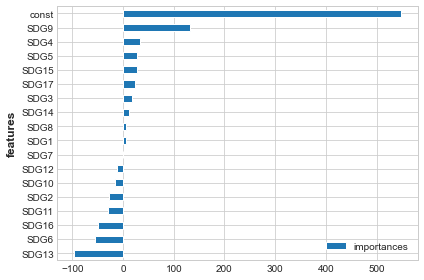

In [25]:
from sklearn import metrics

print('-'*20, 'Fixed Effects Results', '-'*20)

#print('Score Train:', fe_res.score(X, Y))
print('MAE Train:', metrics.mean_absolute_error(Y, fe_res.predict(X)))
print("MAPE Train: ", metrics.mean_absolute_percentage_error(Y,fe_res.predict(X)))
print('MSE Train:', metrics.mean_squared_error(Y, fe_res.predict(X)))
print('RMSE Train:', np.sqrt(metrics.mean_squared_error(Y, fe_res.predict(X))))
print('RMSE / y.mean() Train:', np.sqrt(metrics.mean_squared_error(Y, fe_res.predict(X)))/Y.mean())

print('-'*20)
print('La media de Res_Nonhydro_Capita es:', Y.mean())
print('La desviacio estandar de Res_Nonhydro_Capita es:', Y.std())

print('-'*20)
print('Feature Importance')
importances = pd.DataFrame({'features':X.columns, 'importances':fe_res.params}).sort_values('importances', ascending=False)
#Visualizamos
importances.set_index('features', inplace = True)
display(importances)
importances.sort_values("importances").plot.barh(y='importances');

### MODELOS IV2SLS

#### A.- SIN ESCALADO

In [31]:
from linearmodels import IV2SLS
#Definiendo las variables exoogenas
exog = ['SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15' , 'SDG16', 'SDG17'] 

Y = data['Res_Nonhydro_Capita']
X = sm.add_constant(data[exog]) 


dep = data['Res_Nonhydro_Capita']
exog = data[exog]
endog = None
instr = None

resultIV = IV2SLS(dep, exog, endog, instr).fit() 

resultIV.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                             OLS Estimation Summary                            
===============================================================================
Dep. Variable:     Res_Nonhydro_Capita   R-squared:                      0.4251
Estimator:                         OLS   Adj. R-squared:                 0.4067
No. Observations:                  548   F-statistic:                    482.55
Date:                 Sat, Apr 16 2022   P-value (F-stat)                0.0000
Time:                         12:19:24   Distribution:                 chi2(17)
Cov. Estimator:                 robust                                         
                                                                               
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
SDG1          -11.282     3.0706    -3.6742     0.0002     -17.301     -5.2639
SDG2          -3.3863     5.3613    -0.6316     0.5276     -13.894      7.1216
SDG3          -15.426     7.0910    -2.1755     0.0296     -29.324     -1.5281
SDG4          -14.186     3.2683    -4.3407     0.0000     -20.592     -7.7808
SDG5           25.225     8.1990     3.0766     0.0021      9.1554      41.295
SDG6           0.8991     4.1286     0.2178     0.8276     -7.1927      8.9910
SDG7           13.913     5.1020     2.7270     0.0064      3.9135      23.913
SDG8          -0.2493     4.5472    -0.0548     0.9563     -9.1615      8.6630
SDG9           15.511     3.2320     4.7993     0.0000      9.1767      21.846
SDG10          10.503     3.6038     2.9145     0.0036      3.4400      17.566
SDG11         -4.1135     3.2245    -1.2757     0.2021     -10.433      2.2063
SDG12         -27.987     7.3801    -3.7923     0.0001     -42.452     -13.522
SDG13          15.628     5.3445     2.9242     0.0035      5.1533      26.104
SDG14         -1.7969     6.4926    -0.2768     0.7820     -14.522      10.928
SDG15         -14.049     6.4705    -2.1712     0.0299     -26.731     -1.3667
SDG16          25.549     9.0984     2.8081     0.0050      7.7166      43.382
SDG17          5.7462     3.2481     1.7691     0.0769     -0.6201      12.112
==============================================================================
"""

#### B.- CON ESCALADO

In [33]:
from linearmodels import IV2SLS

#Definiendo las variables exoogenas
exog = ['SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15' , 'SDG16', 'SDG17'] 

Y = data['Res_Nonhydro_Capita']

std_scale = preprocessing.StandardScaler().fit(data[exog])
X_scal = std_scale.transform(data[exog])
X_scal_aux = pd.DataFrame(X_scal, columns = exog)
X = sm.add_constant(X_scal_aux) 


# RECREA DE NUEVO tuples (individual, year) to initialize index
tuples = [] 
for i in range(1,nIndividualsSDGs_Scores + 1): 
    for j in range(1,nYearsSDGs_Scores + 1 ): 
        tuples.append((i,j)) 
index = pd.MultiIndex.from_tuples(tuples, names=['Individual', 'Year']) 

X.index = index 

dep = Y
exog = X
endog = None
instr = None

resultIV = IV2SLS(dep, exog, endog, instr).fit() 

resultIV.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                             OLS Estimation Summary                            
===============================================================================
Dep. Variable:     Res_Nonhydro_Capita   R-squared:                      0.3494
Estimator:                         OLS   Adj. R-squared:                 0.3285
No. Observations:                  548   F-statistic:                    341.06
Date:                 Sat, Apr 16 2022   P-value (F-stat)                0.0000
Time:                         12:19:30   Distribution:                 chi2(17)
Cov. Estimator:                 robust                                         
                                                                               
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          548.48     51.979     10.552     0.0000      446.60      650.35
SDG1          -303.05     83.960    -3.6095     0.0003     -467.61     -138.49
SDG2          -39.543     66.254    -0.5968     0.5506     -169.40      90.312
SDG3          -281.01     145.62    -1.9297     0.0536     -566.42      4.4031
SDG4          -329.02     74.152    -4.4371     0.0000     -474.35     -183.68
SDG5           426.48     133.74     3.1889     0.0014      164.36      688.61
SDG6           21.246     76.828     0.2765     0.7821     -129.33      171.83
SDG7           366.40     142.78     2.5661     0.0103      86.548      646.24
SDG8          -1.4952     66.228    -0.0226     0.9820     -131.30      128.31
SDG9           397.76     79.696     4.9910     0.0000      241.56      553.96
SDG10          260.37     85.271     3.0534     0.0023      93.241      427.50
SDG11         -67.387     59.354    -1.1353     0.2562     -183.72      48.944
SDG12         -405.14     150.27    -2.6961     0.0070     -699.67     -110.62
SDG13          253.63     79.923     3.1734     0.0015      96.982      410.28
SDG14         -17.381     76.194    -0.2281     0.8196     -166.72      131.96
SDG15         -195.68     97.057    -2.0161     0.0438     -385.90     -5.4496
SDG16          366.47     112.94     3.2447     0.0012      145.10      587.83
SDG17          87.332     38.289     2.2809     0.0226      12.287      162.38
==============================================================================
"""